# **Ejercicio: Predicción de caudal en función del clima**

**Contexto**: Se desea predecir el caudal diario (Q) de un río con base en variables meteorológicas. Se dispone de registros históricos de:
- Precipitación diaria (P) en mm
- Temperatura media diaria (T) en °C
- Radiación solar diaria (R) en MJ/m²
- Y el caudal observado (Q) en m³/s

## Paso 1: Cargar y explorar los datos
Generamos datos simulados (aleatorios). Puedes reemplazarlos por datos reales en formato CSV o Excel.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Leer el archivo CSV con separador de columnas y posibles comas como separador decimal
ruta = '/content/drive/MyDrive/METODOS_Y_MODELOS/5_Quinta_Sesion/Datos_5/Serie_Climatologica_Bogota_2024_AJUSTADA.csv'
df = pd.read_csv(ruta)#, sep=';', decimal=',')
df.head()

,Fecha,Temperatura_C,Precipitacion_mm,Radiacion_Wh_m2,Caudal_m3s
0,2024-01-01,12.956752,8.407785,4887.444020,0.0
1,2024-01-02,14.401584,5.937916,4621.067467,0.0
2,2024-01-03,14.179052,4.759799,4242.718623,0.0
3,2024-01-04,15.039937,1.509470,4560.242318,0.0
4,2024-01-05,14.354200,0.893627,4161.262342,0.0


# ============================================
# **Introducción a la librería scikit-learn**
# ============================================

## Métodos principales de la librería:

```
- fit(X, y): Ajusta el modelo a los datos
- predict(X): Predice los valores de salida
- score(X, y): Retorna el R² del modelo (bondad de ajuste)
- intercept_: Término independiente (β₀)
- coef_: Coeficientes del modelo (β₁, β₂, ...)
```

# ============================================


## Paso 2: Regresión lineal simple
**Pregunta:** ¿Qué tan bien se explica el caudal solo con la precipitación?

## **Cálculo de parametros del modelo de Regresión Lineal Simple - (Método Análitico)**




In [ ]:
# Seleccionar variables
x = df['Precipitacion_mm'].values
y = df['Caudal_m3s'].values


Pendiente (beta_1): 0.18018673924096815
Intercepto (beta_0): 3.483103406242981


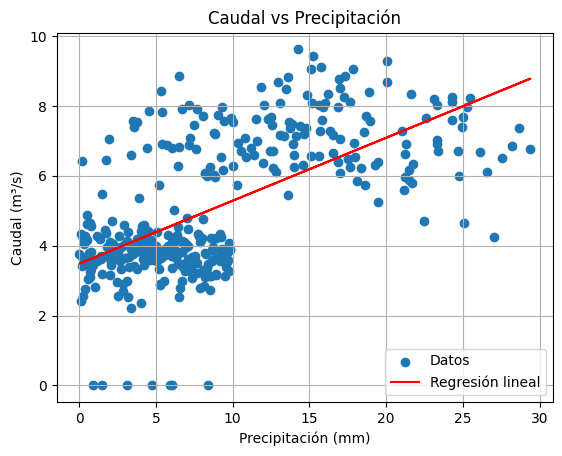

## **Modelo ajustado:**

$
y = 3.4831 + 0.1801 x
$

**Interpretación:**

- Cuando no hay precipitación $(x = 0)$, el caudal es aproximadamente **3.48 m³/s**.
- Por cada milímetro adicional de precipitación, el caudal aumenta en promedio **0.1801 m³/s**.


## **Cálculo de parametros del modelo de Regresión Lineal Simple - (Método Solver Python)**

Intercepto: 3.4831034062429813
Pendiente: [0.18018674]


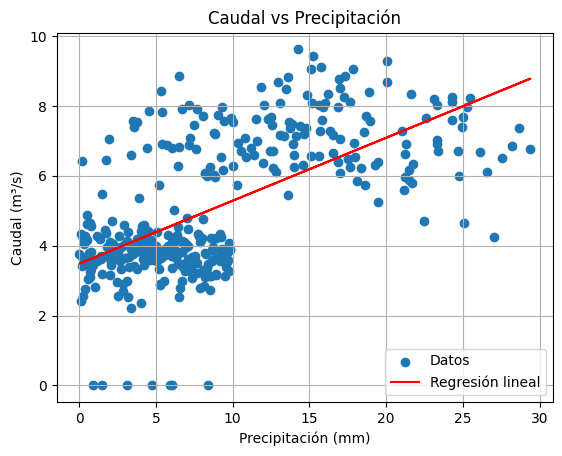

In [ ]:
from sklearn.linear_model import LinearRegression

# Nota: aunque sea una sola variable, X1 se pone #con doble corchete [['...']]
# para que sea un DataFrame y no una Serie, ya que scikit-learn espera una matriz de entrada.
X1 = df[['Precipitacion_mm']]

# y es la variable respuesta → Caudal.
y = df['Caudal_m3s']

# Aquí se crea un modelo de regresión lineal (LinearRegression())
# Luego, .fit(X1, y) entrena el modelo: calcula los valores óptimos de
# 𝛽0 (intercepto) y 𝛽1 (pendiente) de la recta.
modelo_simple = LinearRegression().fit(X1, y)

# Muestra el valor de 𝛽0, es decir, el valor del caudal cuando la precipitación es cero.
print("Intercepto:", modelo_simple.intercept_)

#Muestra 𝛽1, o sea, cuánto aumenta el caudal por cada unidad de precipitación (mm).
#coef_ devuelve un array (porque podría haber más de una variable predictora).
print("Pendiente:", modelo_simple.coef_)


#Genera las predicciones de caudal para cada valor observado de
#Precipitación usando el modelo entrenado.
#Es decir, aplica la fórmula: y​=β0+β1x
y_pred = modelo_simple.predict(X1)
#print(y_pred)

#Grafica
plt.scatter(X1, y, label="Datos")
plt.plot(X1, y_pred, color='red', label="Regresión lineal")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Caudal (m³/s)")
plt.title("Caudal vs Precipitación")
plt.legend()
plt.grid(True)
plt.show()

## Paso 3: Regresión lineal múltiple
**Pregunta:** ¿Se mejora la predicción del caudal si se incluyen todas las variables climáticas?

### Solucion Analítica

In [ ]:
import numpy as np

# Paso 1
X = np.array([[1, 1, 2],
              [1, 2, 1],
              [1, 3, 4]])


array([2.25, 2.25, 0.25])

### Solución con Scikit-learn


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Matriz de características con columna de unos incluida
X = np.array([[1, 1, 2],
              [1, 2, 1],
              [1, 3, 4]])

# Vector de salida
y = np.array([5, 7, 10])

# Crear modelo sin intercepto, porque ya está incluido en X
model = LinearRegression(fit_intercept=False)

# Ajustar el modelo
model.fit(X, y)

# Mostrar coeficientes (β)
print("Coeficientes β =", model.coef_)
print("Coeficientes β =", model.intercept_)


Coeficientes β = [2.25 2.25 0.25]
Coeficientes β = 0.0


### Solución del Ejercicio de Predicción del Caudal con Scikit-learn

In [ ]:
X_multi = df[['Precipitacion_mm', 'Temperatura_C', 'Radiacion_Wh_m2']]
y = df['Caudal_m3s']

modelo_multi = LinearRegression(fit_intercept=True)
modelo_multi.fit(X_multi, y)

print("Intercepto:", modelo_multi.intercept_)
print("Coeficientes:", modelo_multi.coef_)

Intercepto: 8.745127645659021
Coeficientes: [ 0.13212873  0.09558678 -0.00171232]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


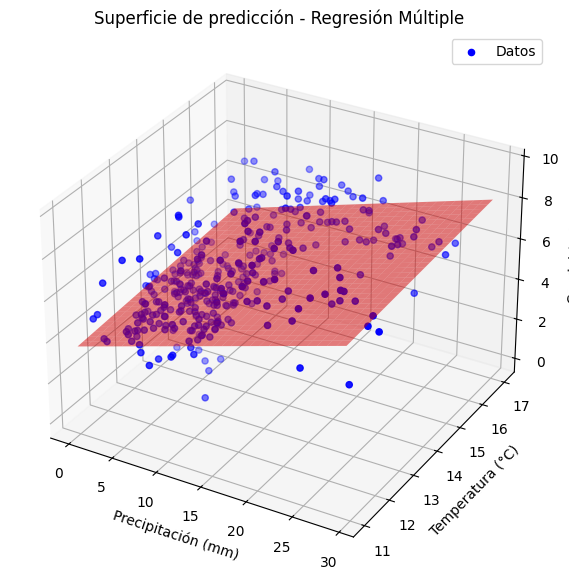

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Definir mallas
P_range = np.linspace(df['Precipitacion_mm'].min(), df['Precipitacion_mm'].max(), 30)
T_range = np.linspace(df['Temperatura_C'].min(), df['Temperatura_C'].max(), 30)
P_mesh, T_mesh = np.meshgrid(P_range, T_range)
R_mean = df['Radiacion_Wh_m2'].mean()

# Predicción sobre la malla
X_mesh = np.column_stack((P_mesh.ravel(), T_mesh.ravel(), np.full(P_mesh.size, R_mean)))
y_mesh_pred = modelo_multi.predict(X_mesh)

# Graficar
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Precipitacion_mm'], df['Temperatura_C'], y, color='blue', label='Datos')
ax.plot_surface(P_mesh, T_mesh, y_mesh_pred.reshape(P_mesh.shape), alpha=0.5, color='red')

ax.set_xlabel('Precipitación (mm)')
ax.set_ylabel('Temperatura (°C)')
ax.set_zlabel('Caudal (m³/s)')
ax.set_title('Superficie de predicción - Regresión Múltiple')

plt.legend()
plt.show()


## Paso 4: Regresión polinómica (grado 2)

### **¿Cuándo usarla?**
> * Cuando los datos no siguen una relación lineal, pero la curva tiene una forma suave y continua (como una parábola, campana o curva ascendente/descendente).
> * Por ejemplo, el caudal de un río puede aumentar con la precipitación, pero después de cierto punto se satura o se dispersa → una curva lo representa mejor que una línea recta.
   
   
**Pregunta:** *¿Qué pasa si el efecto de la precipitación no es lineal?*

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


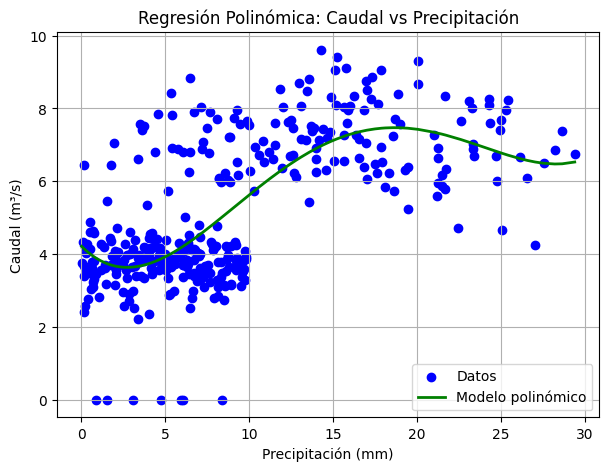

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Crear transformador polinómico de grado 2
#Esto crea un transformador de variables que va a generar:
# - Una columna para 𝑥0=1 (intercepto)
# - Una columna para 𝑥1
# - Una columna para 𝑥2
poly = PolynomialFeatures(degree=4)

# Preparar variables
# X: matriz de entrada (precipitación), en forma de DataFrame.
# y: vector objetivo (caudal).
# X_poly: resultado de transformar la columna de precipitación a un diseño polinómico de grado 2.
# Transformar X para incluir la columna P^2
# Ejemplo: si 𝑥=10, obtienes [1,10,100]
X = df[['Precipitacion_mm']]
y = df['Caudal_m3s']
X_poly = poly.fit_transform(X)

# Ajustar modelo
# Se ajusta el modelo de regresión a los datos transformados
#Esto te da un modelo de la forma: y=𝛽0+𝛽1x+𝛽2x^2
modelo_poly = LinearRegression().fit(X_poly, y)

#GRAFICA
# Ordenar X para graficar suavemente
X_sorted = np.sort(X.values.reshape(-1))  # convierte a vector ordenado
# Transforma los valores ordenados en su forma polinómica.
X_sorted_poly = poly.transform(X_sorted.reshape(-1, 1))  # transforma a polinómico

#Se usan los valores ordenados de precipitación para predecir el caudal estimado por el modelo cuadrático.
# Predicciones ordenadas
y_pred_sorted = modelo_poly.predict(X_sorted_poly)

# Graficar
plt.figure(figsize=(7, 5))
plt.scatter(X, y, label="Datos", color='blue')
plt.plot(X_sorted, y_pred_sorted, color='green', linewidth=2, label="Modelo polinómico")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Caudal (m³/s)")
plt.title("Regresión Polinómica: Caudal vs Precipitación")
plt.legend()
plt.grid(True)
plt.show()

## Paso 5: Regresión exponencial
**Pregunta:** ¿El caudal responde de forma exponencial a la precipitación?

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Supongamos que tienes tus datos:
x = df[['Precipitacion_mm']]
y = df['Caudal_m3s']

# Transformar y aplicando logaritmo natural
# para evitar log(0) osea un error
y_log = np.log(np.where(y > 0, y, 0.1))

# Ajustar modelo lineal sobre log(y)
modelo_exp = LinearRegression().fit(x, y_log)

# Coeficientes:
print("log(a):", modelo_exp.intercept_)
print("b:", modelo_exp.coef_[0])

log(a): 1.1526444659840411
b: 0.03993828931739055


In [ ]:
np.log(3)

np.float64(1.0986122886681098)

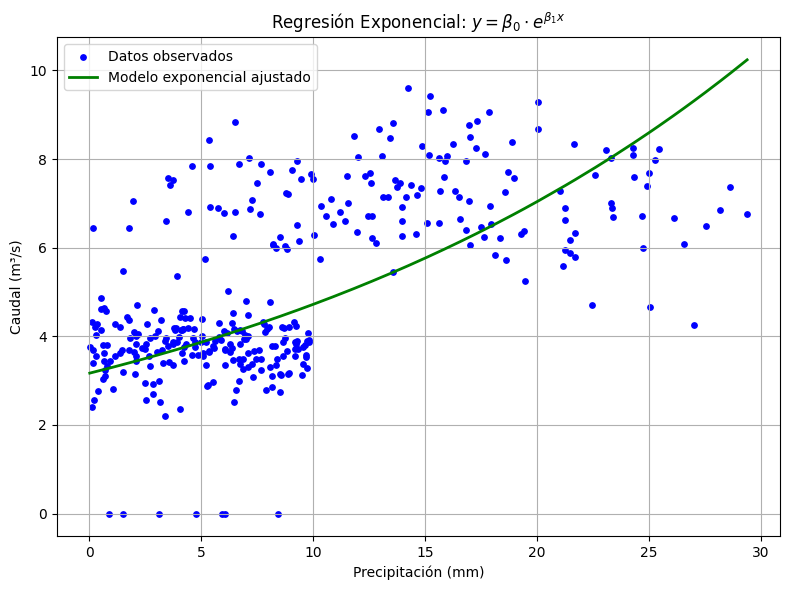

In [ ]:
# Reimportar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prepara las variables
x = df[['Precipitacion_mm']]
y = df['Caudal_m3s']

# Aplicar logaritmo natural
y_log = np.log(np.where(y > 0, y, 0.1))

# Ajustar modelo exponencial linealizado
modelo_exp = LinearRegression().fit(x, y_log)

# Coeficientes del modelo exponencial
log_a = modelo_exp.intercept_
b = modelo_exp.coef_[0]

# Predicción y = a * exp(bx)
y_pred = np.exp(modelo_exp.predict(x))


# Graficar
# Ordenar los valores para graficar una curva suave
x_sorted = x.sort_values(by='Precipitacion_mm')
y_pred_sorted = np.exp(modelo_exp.predict(x_sorted))

plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Datos observados", color='blue', s=15)
plt.plot(x_sorted, y_pred_sorted, label="Modelo exponencial ajustado", color='green', linewidth=2)
plt.xlabel("Precipitación (mm)")
plt.ylabel("Caudal (m³/s)")
plt.title("Regresión Exponencial: $y = \\beta_{0} \\cdot e^{\\beta_{1}x}$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Actividades sugeridas para los estudiantes
1. Comparar visual y numéricamente los modelos lineales simple y múltiple usando $R^2$ y el error cuadrático medio (MSE).
2. Interpretar el coeficiente de la temperatura en la regresión múltiple.
3. Evaluar si un modelo exponencial tiene sentido físico en este contexto.

-----

## **Evaluar si un modelo exponencial tiene sentido físico en este contexto**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Regresión Lineal Simple
y_pred_simple = modelo_simple.predict(X1)
r2_simple = r2_score(y, y_pred_simple)
mse_simple = mean_squared_error(y, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
mae_simple = mean_absolute_error(y, y_pred_simple)

# Regresión Lineal Múltiple
y_pred_multi = modelo_multi.predict(X_multi)
r2_multi = r2_score(y, y_pred_multi)
mse_multi = mean_squared_error(y, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
mae_multi = mean_absolute_error(y, y_pred_multi)

# Imprimir resultados
print("Modelo Lineal Simple:")
print("R²:", r2_simple)
print("MSE:", mse_simple)
print("RMSE:", rmse_simple)
print("MAE:", mae_simple)

print("\nModelo Lineal Múltiple:")
print("R²:", r2_multi)
print("MSE:", mse_multi)
print("RMSE:", rmse_multi)
print("MAE:", mae_multi)


Modelo Lineal Simple:
R²: 0.3895533627431208
MSE: 2.3670713934497924
RMSE: 1.5385289706241454
MAE: 1.1996035328709076

Modelo Lineal Múltiple:
R²: 0.49707826789538967
MSE: 1.9501322024779946
RMSE: 1.3964713396550588
MAE: 1.1254227987989747


**Evaluación física**:

- El modelo exponencial implica que el caudal crece de manera acelerada con la precipitación.

- Aunque puede aproximar el comportamiento para lluvias moderadas, **no es realista para lluvias muy grandes** porque los sistemas hídricos tienen límites físicos.

- Por tanto, el modelo exponencial es útil para predicciones locales o moderadas, pero no extrapolables a eventos extremos.